In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/road_accident.csv')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()
cat_list=['Code']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [7]:
print(data['Sidedness'].value_counts())

0    6300
1    1710
Name: Sidedness, dtype: int64


In [8]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 19.5 MB/s eta 0:00:00


In [9]:
import pycountry

In [10]:
countries = data['Country'].unique()

print(countries)
print("Total number of unique countries:", len(countries))

['Afghanistan' 'Africa' 'African Region' 'African Union' 'Albania'
 'Algeria' 'America' 'American Samoa' 'Andean Latin America' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australasia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean' 'Central African Republic' 'Central Asia'
 'Central Europe' 'Central Europe, Eastern Europe, and Central Asia'
 'Central Latin America' 'Central sub-Saharan Africa' 'Chad' 'Chile'
 'China' 'Colombia' 'Commonwealth' 'Commonwealth High Income'
 'Commonwealth Low Income' 'Commonwealth Middle Income' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East As

In [11]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries and make it unique
data_valid_countries = data[data['Country'].isin(valid_countries)].drop_duplicates(subset='Country')

# Convert the 'Country' column to a Python list
valid_countries_list = data_valid_countries['Country'].tolist()

print(valid_countries_list)
print("Total count of valid countries:", len(valid_countries_list))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan'

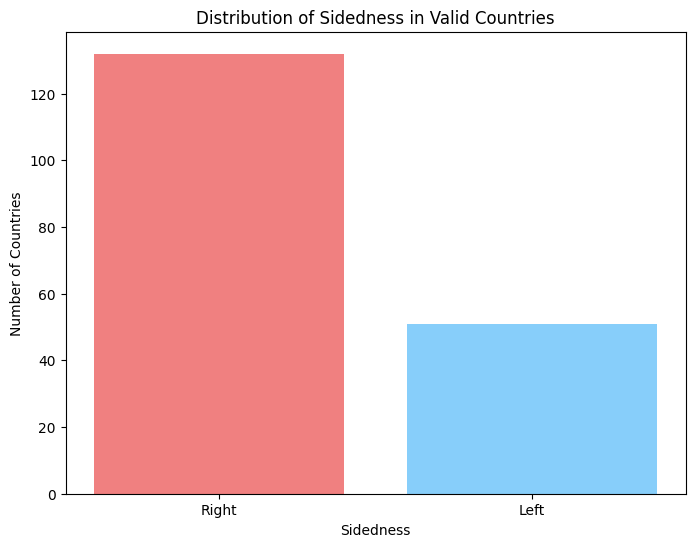

In [12]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = data[data['Country'].isin(valid_countries)]

# Count the number of unique countries for each 'Sidedness' value
unique_countries_count = df_valid_countries.groupby('Sidedness')['Country'].nunique()

# Map Sidedness values to their corresponding labels
sidedness_labels = {0: 'Right', 1: 'Left'}

# Create labels for the bar graph
labels = [sidedness_labels[i] for i in unique_countries_count.index]

# Plot a bar graph for the distribution of 'Sidedness' in valid countries
plt.figure(figsize=(8, 6))
plt.bar(labels, unique_countries_count.values, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Sidedness')
plt.ylabel('Number of Countries')
plt.title('Distribution of Sidedness in Valid Countries')
plt.show()


Total Deaths for Left-Side Drivers: 18491902
Total Deaths for Right-Side Drivers: 13016175


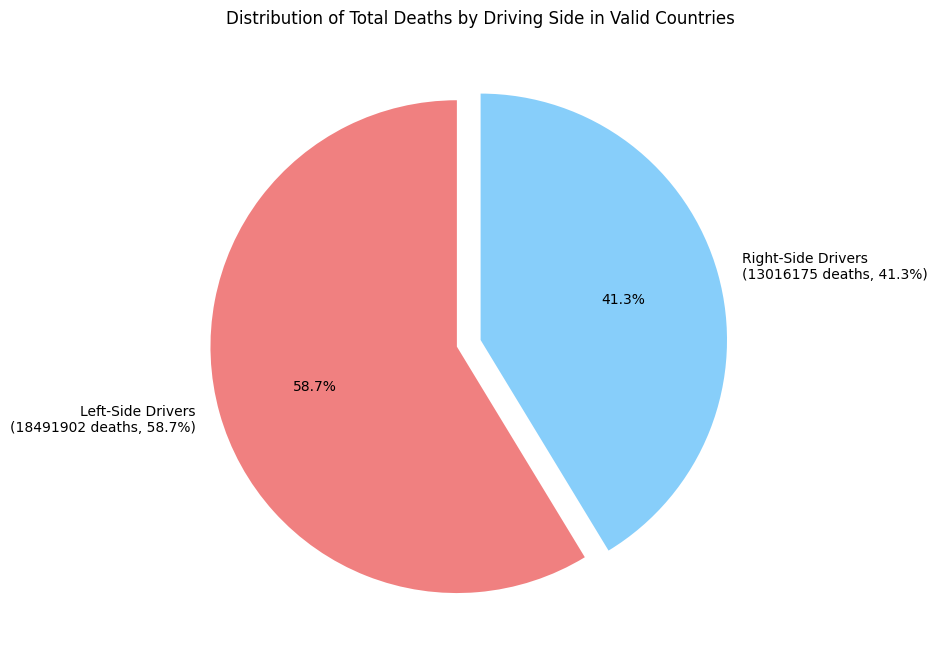

In [13]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
data_valid_countries = data[data['Country'].isin(valid_countries)]

# Calculate total deaths for left-side drivers (Sidedness = 1) and right-side drivers (Sidedness = 0)
total_deaths_left = data_valid_countries[data_valid_countries['Sidedness'] == 1]['Deaths'].sum()
total_deaths_right = data_valid_countries[data_valid_countries['Sidedness'] == 0]['Deaths'].sum()

# Create a pie chart with labels showing both percentage and total deaths
labels = [f'Left-Side Drivers\n({total_deaths_left} deaths, {total_deaths_left / (total_deaths_left + total_deaths_right) * 100:.1f}%)',
          f'Right-Side Drivers\n({total_deaths_right} deaths, {total_deaths_right / (total_deaths_left + total_deaths_right) * 100:.1f}%)']
sizes = [total_deaths_left, total_deaths_right]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Left-Side Drivers)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Print the values
print(f"Total Deaths for Left-Side Drivers: {total_deaths_left}")
print(f"Total Deaths for Right-Side Drivers: {total_deaths_right}")

plt.title('Distribution of Total Deaths by Driving Side in Valid Countries')
plt.show()

In [14]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data' containing relevant information including:
# - 'Country': Name of the country
# - 'Sidedness': Indicator of driving side (0 for right, 1 for left)
# - 'Deaths': Number of traffic-related deaths

# Filter DataFrame to include only valid countries
df_valid_countries = data[data['Country'].isin(valid_countries)]

# Separate data for countries driving on the right side and on the left side
right_side_data = df_valid_countries[df_valid_countries['Sidedness'] == 0]['Deaths']
left_side_data = df_valid_countries[df_valid_countries['Sidedness'] == 1]['Deaths']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(right_side_data, left_side_data)

# Print the results
print("Mann-Whitney U Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine significance level
alpha = 0.05
if p_value < alpha:
    print("Null hypothesis rejected: There is a statistically significant difference in traffic-related deaths between countries driving on the right side and countries driving on the left side.")
else:
    print("Null hypothesis cannot be rejected: There is no statistically significant difference in traffic-related deaths between countries driving on the right side and countries driving on the left side.")


Mann-Whitney U Test:
Statistic: 3634324.0
P-value: 1.5016884813311188e-30
Null hypothesis rejected: There is a statistically significant difference in traffic-related deaths between countries driving on the right side and countries driving on the left side.


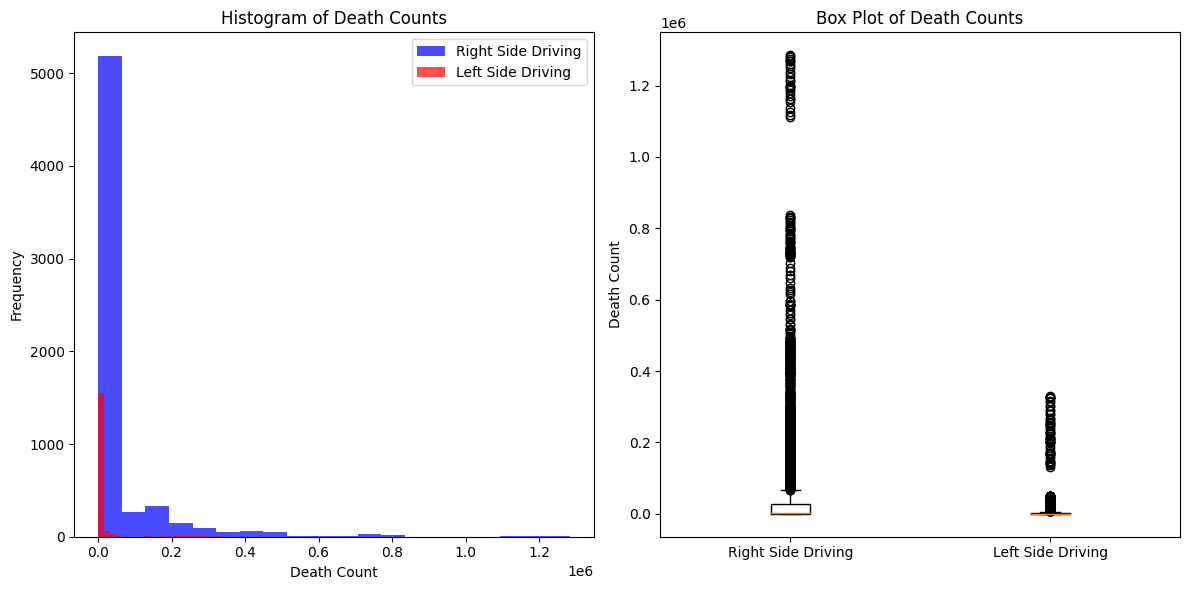

In [15]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing relevant information including:
# - 'Deaths': Number of traffic-related deaths
# - 'Sidedness': Indicator of driving side (0 for right, 1 for left)

# Separate death counts for countries with right and left side driving
right_side_deaths = data[data['Sidedness'] == 0]['Deaths']
left_side_deaths = data[data['Sidedness'] == 1]['Deaths']

# Create a figure and axis object
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram for death counts
axes[0].hist(right_side_deaths, bins=20, alpha=0.7, color='blue', label='Right Side Driving')
axes[0].hist(left_side_deaths, bins=20, alpha=0.7, color='red', label='Left Side Driving')
axes[0].set_xlabel('Death Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Death Counts')
axes[0].legend()

# Create a box plot for death counts
axes[1].boxplot([right_side_deaths, left_side_deaths], labels=['Right Side Driving', 'Left Side Driving'])
axes[1].set_ylabel('Death Count')
axes[1].set_title('Box Plot of Death Counts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


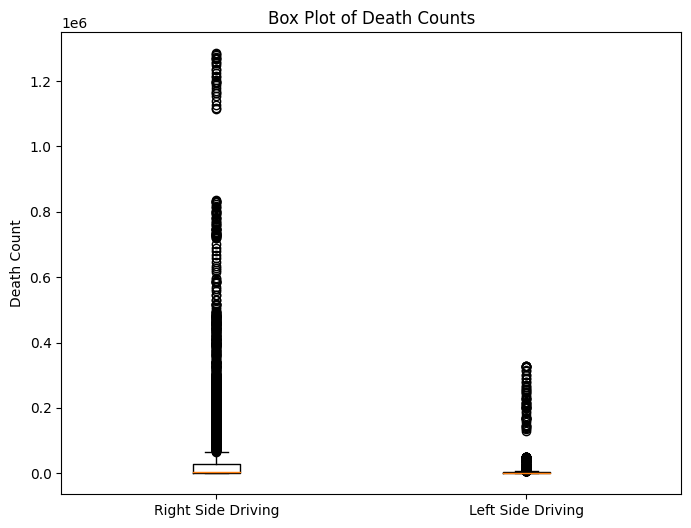

In [16]:
import matplotlib.pyplot as plt

# Separate death counts for countries with right and left side driving
right_side_deaths = data[data['Sidedness'] == 0]['Deaths']
left_side_deaths = data[data['Sidedness'] == 1]['Deaths']

# Create a box plot for death counts
plt.figure(figsize=(8, 6))
plt.boxplot([right_side_deaths, left_side_deaths], labels=['Right Side Driving', 'Left Side Driving'])
plt.ylabel('Death Count')
plt.title('Box Plot of Death Counts')
plt.show()


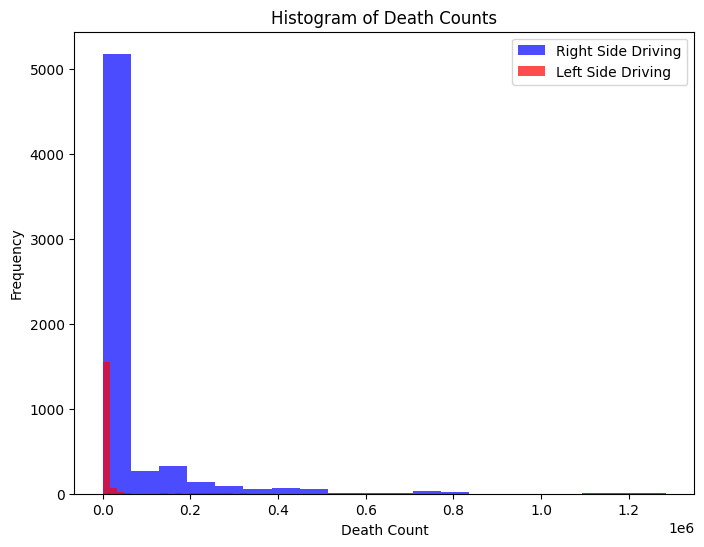

In [17]:
import matplotlib.pyplot as plt

# Separate death counts for countries with right and left side driving
right_side_deaths = data[data['Sidedness'] == 0]['Deaths']
left_side_deaths = data[data['Sidedness'] == 1]['Deaths']

# Create a histogram for death counts
plt.figure(figsize=(8, 6))
plt.hist(right_side_deaths, bins=20, alpha=0.7, color='blue', label='Right Side Driving')
plt.hist(left_side_deaths, bins=20, alpha=0.7, color='red', label='Left Side Driving')
plt.xlabel('Death Count')
plt.ylabel('Frequency')
plt.title('Histogram of Death Counts')
plt.legend()
plt.show()


<ipython-input-18-0cf6c1305504>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sidedness', y='Deaths', data=data, palette=['blue', 'red'])


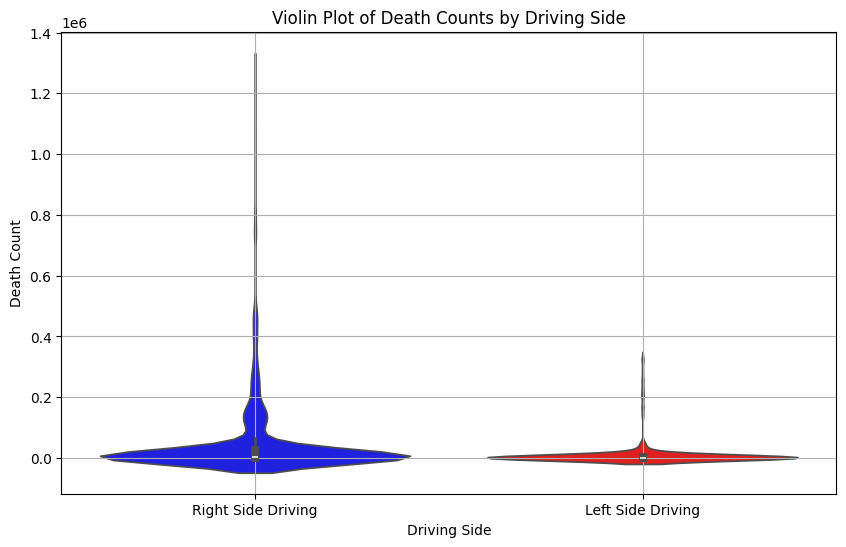

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' containing relevant information including:
# - 'Deaths': Number of traffic-related deaths
# - 'Sidedness': Indicator of driving side (0 for right, 1 for left)

# Create a violin plot to compare the distribution of death counts between right and left side driving countries
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sidedness', y='Deaths', data=data, palette=['blue', 'red'])
plt.xlabel('Driving Side')
plt.ylabel('Death Count')
plt.title('Violin Plot of Death Counts by Driving Side')
plt.xticks([0, 1], ['Right Side Driving', 'Left Side Driving'])
plt.grid(True)
plt.show()


<ipython-input-20-995d1936e2a6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sidedness', y='Deaths', data=df_valid_countries, palette=['blue', 'red'])


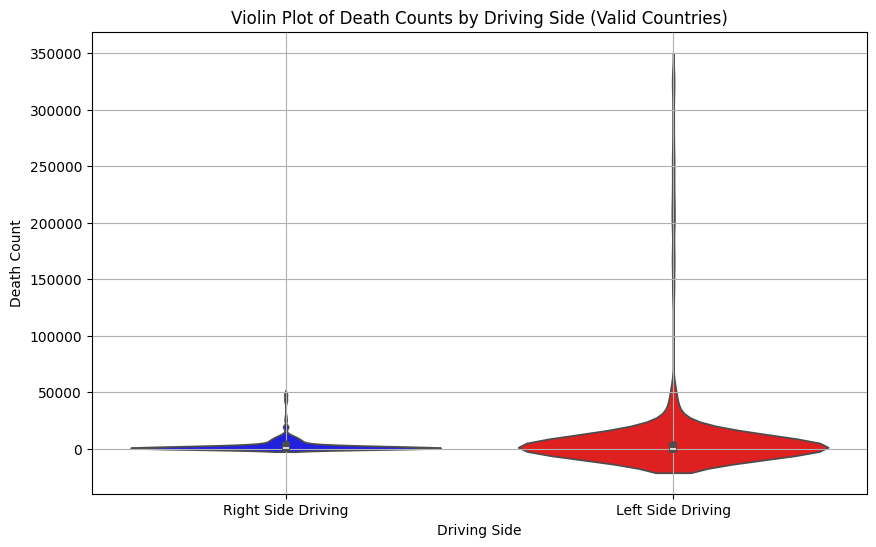

In [20]:
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = data[data['Country'].isin(valid_countries)]

# Count the number of unique countries for each 'Sidedness' value
unique_countries_count = df_valid_countries.groupby('Sidedness')['Country'].nunique()

# Create a violin plot to compare the distribution of death counts between right and left side driving countries
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sidedness', y='Deaths', data=df_valid_countries, palette=['blue', 'red'])
plt.xlabel('Driving Side')
plt.ylabel('Death Count')
plt.title('Violin Plot of Death Counts by Driving Side (Valid Countries)')
plt.xticks([0, 1], ['Right Side Driving', 'Left Side Driving'])
plt.grid(True)
plt.show()


In [21]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing relevant information including:
# - 'Deaths': Number of traffic-related deaths
# - 'Sidedness': Indicator of driving side (0 for right, 1 for left)

# Separate death counts for countries with right and left side driving
right_side_deaths = data[data['Sidedness'] == 0]['Deaths']
left_side_deaths = data[data['Sidedness'] == 1]['Deaths']

# Calculate summary statistics for right side driving
right_side_mean = right_side_deaths.mean()
right_side_median = right_side_deaths.median()
right_side_std = right_side_deaths.std()

# Calculate summary statistics for left side driving
left_side_mean = left_side_deaths.mean()
left_side_median = left_side_deaths.median()
left_side_std = left_side_deaths.std()

# Print summary statistics
print("Summary Statistics for Right Side Driving:")
print(f"Mean: {right_side_mean}")
print(f"Median: {right_side_median}")
print(f"Standard Deviation: {right_side_std}")

print("\nSummary Statistics for Left Side Driving:")
print(f"Mean: {left_side_mean}")
print(f"Median: {left_side_median}")
print(f"Standard Deviation: {left_side_std}")


Summary Statistics for Right Side Driving:
Mean: 53623.66206349206
Median: 2504.0
Standard Deviation: 139910.01128500322

Summary Statistics for Left Side Driving:
Mean: 10964.332748538012
Median: 229.0
Standard Deviation: 43542.087337683406
